In [ ]:
# -------------------------------
# 1. Setup inicial
# -------------------------------

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

# Configuraciones generales de visualización
pd.set_option('display.max_columns', None)
plt.style.use('ggplot')


In [2]:
# -------------------------------
# 2. Carga de datos
# -------------------------------

# Cargamos todos los archivos
internet = pd.ExcelFile(r'C:\Users\Usuario\Desktop\Henry- DS\LABS\PI - DA\data\Internet.xlsx')
telefonia_fija = pd.ExcelFile(r'C:\Users\Usuario\Desktop\Henry- DS\LABS\PI - DA\data\telefonia_fija.xlsx')
telefonia_movil = pd.ExcelFile(r'C:\Users\Usuario\Desktop\Henry- DS\LABS\PI - DA\data\Telefonia_movil.xlsx')
television = pd.ExcelFile(r'C:\Users\Usuario\Desktop\Henry- DS\LABS\PI - DA\data\Television.xlsx')
servicios_postales = pd.ExcelFile(r'C:\Users\Usuario\Desktop\Henry- DS\LABS\PI - DA\data\servicios_postales.xlsx')
mapa_conectividad = pd.ExcelFile(r'C:\Users\Usuario\Desktop\Henry- DS\LABS\PI - DA\data\mapa_conectividad.xlsx')

print("Archivos cargados correctamente ")


Archivos cargados correctamente 


In [3]:
# -------------------------------
# 3. Revisión inicial
# -------------------------------

# Vemos las hojas disponibles en cada archivo
print(internet.sheet_names)
print(telefonia_fija.sheet_names)
print(telefonia_movil.sheet_names)
print(television.sheet_names)
print(servicios_postales.sheet_names)
print(mapa_conectividad.sheet_names)

# Para este proyecto, seleccionamos la hoja que contenga el resumen o por provincia.
df_internet = internet.parse(internet.sheet_names[0])
df_fija = telefonia_fija.parse(telefonia_fija.sheet_names[0])
df_movil = telefonia_movil.parse(telefonia_movil.sheet_names[0])
df_tv = television.parse(television.sheet_names[0])
df_postal = servicios_postales.parse(servicios_postales.sheet_names[0])
df_mapa = mapa_conectividad.parse(mapa_conectividad.sheet_names[0])

# Vemos las primeras filas de cada dataset
df_internet.head()


['Acc_vel_loc_sinrangos', 'Velocidad_sin_Rangos', 'Accesos_tecnologia_localidad', 'Velocidad % por prov', 'Totales VMD', 'Totales Accesos Por Tecnología', 'Accesos Por Tecnología', 'Penetración-poblacion', 'Penetracion-hogares', 'Penetracion-totales', 'Totales Accesos por rango', 'Accesos por rangos', 'Dial-BAf', 'Totales Dial-BAf', 'Ingresos ']
['Fija_prov_tipo', 'Fija_accesos_tot', 'Fija_penetracion_prov', 'Fija_penetracion_tot', 'Fija_ingresos']
['SMS', 'Llamadas salientes', 'Minutos salientes', 'Ingresos', 'Penetracion', 'Accesos', 'Hoja1']
['Accesos_prov_TV', 'Accesos_totales_TV', 'Ingresos_TV', 'Penetracion_prov_TV', 'Penetracion_totales_TV']
['ventas_postales', 'ventas_telegraficas', 'venta_monetarios', 'ventas_unidades_provincias', 'personal_ocupado', 'unidades_postales', 'unidades_telegraficas', 'unidades_monetarios']
['Hoja3']


,Partido,Localidad,link Indec,Velocidad (Mbps),Provincia,Accesos
0,BUENOS AIRES,25 de Mayo,25 de Mayo,6854100,0.00,1.0
1,BUENOS AIRES,25 de Mayo,25 de Mayo,6854100,0.50,2.0
2,BUENOS AIRES,25 de Mayo,25 de Mayo,6854100,0.75,19.0
3,BUENOS AIRES,25 de Mayo,25 de Mayo,6854100,3.00,85.0
4,BUENOS AIRES,25 de Mayo,25 de Mayo,6854100,3.50,145.0


In [4]:
df_fija.head()

,Año,Trimestre,Provincia,Accesos telefonía fija (total),Accesos telefonía fija (hogares),Accesos telefonía fija (comercial),Accesos telefonía fija (gobierno),Accesos telefonía fija (otros)
0,2024,2,Buenos Aires,3147886,2793773,299661,12436,42016
1,2024,2,Capital Federal,1651854,1466033,157247,6526,22048
2,2024,2,Catamarca,20365,18074,1939,80,272
3,2024,2,Chaco,53967,47897,5137,213,720
4,2024,2,Chubut,54140,48049,5154,214,723


In [5]:
df_tv.head()

,Año,Trimestre,Provincia,Accesos TV por suscripción (Vrf)
0,2024,2,Buenos Aires,2873482
1,2024,2,Capital Federal,693686
2,2024,2,Catamarca,54865
3,2024,2,Chaco,115238
4,2024,2,Chubut,78471


In [6]:
df_movil.head()

,Año,Trimestre,Número de SMS salientes,Periodo
0,2013,1,36430004057,Ene-Mar 2013
1,2013,2,34255065773,Abr-Jun 2013
2,2013,3,33217669903,Jul-Sept 2013
3,2013,4,22547130953,Oct-Dic 2013
4,2014,1,18393198881,Ene-Mar 2013


In [7]:
df_postal.head()

,Año,Mes,Correo oficial + Correos Privados (en Pesos),Unnamed: 3,Unnamed: 4,Unnamed: 5,id,año,trimestre,tipo,servicio,indicador,valor,unidad,observaciones
0,2024,Junio,1.016941e+11,NaN,NaN,NaN,NaN,2024.0,2.0,Información Económica,Servicios Postales,Ingresos Postales,4.996840e+11,Miles de $,Información acumulada
1,2024,Mayo,1.021353e+11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2024,Abril,8.716587e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2024,Marzo,7.672678e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2024,Febrero,6.701408e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# Revisión rápida de dimensiones y tipos de datos
for name, df in [('Internet', df_internet), ('Fija', df_fija), ('Movil', df_movil),
                 ('Television', df_tv), ('Postal', df_postal), ('Mapa', df_mapa)]:
    print(f"\n{name} Dataset:")
    print(df.shape)
    print(df.dtypes)



Internet Dataset:
(18864, 6)
Partido              object
Localidad            object
link Indec           object
Velocidad (Mbps)     object
Provincia           float64
Accesos             float64
dtype: object

Fija Dataset:
(1008, 8)
Año                                    int64
Trimestre                              int64
Provincia                             object
Accesos telefonía fija (total)         int64
Accesos telefonía fija (hogares)       int64
Accesos telefonía fija (comercial)     int64
Accesos telefonía fija (gobierno)      int64
Accesos telefonía fija (otros)         int64
dtype: object

Movil Dataset:
(46, 4)
Año                         int64
Trimestre                   int64
Número de SMS salientes     int64
Periodo                    object
dtype: object

Television Dataset:
(1008, 4)
Año                                  int64
Trimestre                            int64
Provincia                           object
Accesos TV por suscripción (Vrf)     int64
dtype: objec

Internet: Eliminados 0 duplicados.
Fija: Eliminados 0 duplicados.
Movil: Eliminados 0 duplicados.
Television: Eliminados 0 duplicados.
Postal: Eliminados 0 duplicados.
Mapa: Eliminados 0 duplicados.

Valores nulos en Internet:
 Partido             0
Localidad           0
link Indec          1
Velocidad (Mbps)    0
Provincia           0
Accesos             7
dtype: int64

Valores nulos en Fija:
 Año                                   0
Trimestre                             0
Provincia                             0
Accesos telefonía fija (total)        0
Accesos telefonía fija (hogares)      0
Accesos telefonía fija (comercial)    0
Accesos telefonía fija (gobierno)     0
Accesos telefonía fija (otros)        0
dtype: int64

Valores nulos en Movil:
 Año                        0
Trimestre                  0
Número de SMS salientes    0
Periodo                    0
dtype: int64

Valores nulos en Television:
 Año                                 0
Trimestre                           0
Provinc

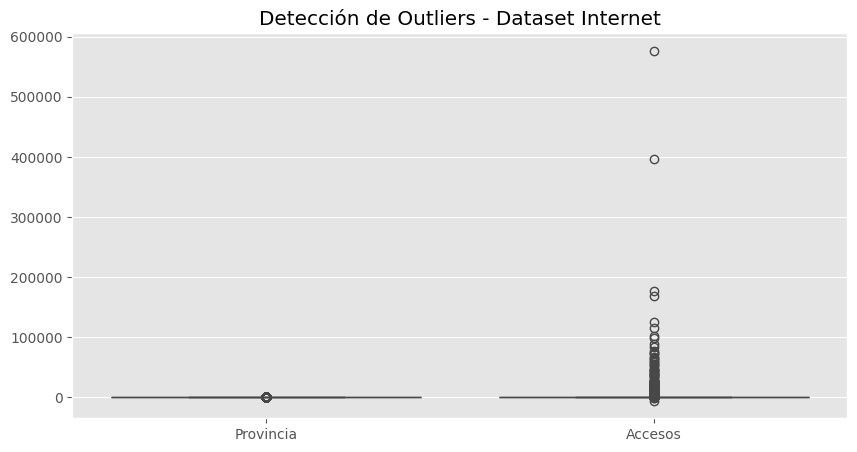

In [ ]:
# -------------------------------
# 4. Limpieza de datos
# -------------------------------

# Eliminamos duplicados
dfs = [df_internet, df_fija, df_movil, df_tv, df_postal, df_mapa]
dfs_names = ['Internet', 'Fija', 'Movil', 'Television', 'Postal', 'Mapa']

for name, df in zip(dfs_names, dfs):
    before = df.shape[0]
    df.drop_duplicates(inplace=True)
    after = df.shape[0]
    print(f"{name}: Eliminados {before - after} duplicados.")

# Revisamos valores nulos
for name, df in zip(dfs_names, dfs):
    print(f"\nValores nulos en {name}:\n", df.isnull().sum())


# Outliers visual (ejemplo sobre Internet)
plt.figure(figsize=(10, 5))
sns.boxplot(data=df_internet.select_dtypes(include=np.number))
plt.title('Detección de Outliers - Dataset Internet')
plt.show()


In [10]:
# 4.1 Correcciones 
# ----------------
# Conversion Velocidad (Mbps) a numerico:
df_internet['Velocidad (Mbps)'] = pd.to_numeric(df_internet['Velocidad (Mbps)'], errors='coerce')

# Internet
df_internet['Velocidad (Mbps)'] = pd.to_numeric(df_internet['Velocidad (Mbps)'], errors='coerce')
df_internet.dropna(subset=['Accesos'], inplace=True)  # Eliminamos filas con 'Accesos' nulo
df_internet.dropna(subset=['link Indec'], inplace=True)

# Postal - eliminamos columnas innecesarias y conversion de datos.
df_postal = df_postal.drop(columns=['Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5', 'id', 'año', 'trimestre', 'observaciones'], errors='ignore')
df_postal['Año'] = df_postal['Año'].astype(int)

# Mapa - Opcional: rellenar o eliminar nulos en 'Link'
df_mapa['Link'] = df_mapa['Link'].fillna(0)



In [ ]:
# ----------------------------------------
#  Limpieza, Correcciones y Exportación
# ----------------------------------------

#  Normalizar columna 'Provincia' en todos los datasets antes del merge
for df in [df_internet, df_fija, df_movil, df_tv, df_postal, df_mapa]:
    if 'Provincia' in df.columns:
        df['Provincia'] = df['Provincia'].astype(str).str.upper().str.strip()

#  Unificar todos los datasets por 'Provincia'
df_merged = df_internet.copy()
for df in [df_fija, df_movil, df_tv, df_postal, df_mapa]:
    if 'Provincia' in df.columns:
        df_merged = df_merged.merge(df, on='Provincia', how='left')

#  Verificación: que 'Población' esté presente desde mapa conectividad
if 'Población' not in df_merged.columns:
    print("⚠️ La columna 'Población' no se encontró. Revisar mapa_conectividad.")
else:
    print("✅ 'Población' cargada correctamente.")

#  Aseguramos que 'Accesos' se use como proxy de 'Hogares Con Internet'
df_merged['Hogares Con Internet'] = df_merged['Accesos']

# Cálculo de KPIs
if 'Población' in df_merged.columns and df_merged['Población'].notna().any():
    df_merged['Penetracion_Internet'] = (df_merged['Accesos'] / df_merged['Población']) * 100
else:
    df_merged['Penetracion_Internet'] = None  # valor nulo si no hay población

df_merged['Proyeccion_Nuevo_Acceso'] = df_merged['Hogares Con Internet'] * 1.02
df_merged['KPI_Incremento_Internet'] = (
    (df_merged['Proyeccion_Nuevo_Acceso'] - df_merged['Hogares Con Internet']) /
    df_merged['Hogares Con Internet']
) * 100

#  Eliminar columnas completamente vacías
df_merged = df_merged.dropna(axis=1, how='all')

# Exportar dataset limpio para app Streamlit
df_merged.to_csv('dataset_kpis.csv', index=False, encoding='utf-8')
print("✅ Dataset final exportado como 'data/dataset_kpis.csv'")

# el data set final luego es movido a la carpeta raiz.

✅ 'Población' cargada correctamente.
✅ Dataset final exportado como 'data/dataset_kpis.csv'
